In [206]:
import numpy as np
import pandas as pd

In [207]:
df=pd.read_csv(r"D:\PycharmProjects\pythonProject\ML_LAB\LAB_1\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [208]:
X= df[['TV', 'Radio', 'Newspaper']].values

In [209]:
Y_actual=df['Sales'].values

In [210]:
Y_actual=Y_actual.reshape(df.shape[0],-1)
Y_actual.shape

(200, 1)

In [211]:
X.shape

(200, 3)

In [212]:
f=np.ones((X.shape[0],1))
f.shape

(200, 1)

In [213]:
X=np.hstack((f,X))
X[0:5]

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4]])

In [214]:
X.shape

(200, 4)

In [215]:
weights=np.random.rand(X.shape[1]).reshape(X.shape[1],1)
weights

array([[0.58364807],
       [0.63845104],
       [0.14893963],
       [0.2489616 ]])

In [216]:
def y_predicted(X,weights):
    return X@weights
Y_predict=y_predicted(X,weights)
Y_predict.shape

(200, 1)

In [217]:
def mse_loss(Y_actual,weights):
    Y_predict=y_predicted(X,weights)
    return np.mean((Y_actual-Y_predict)**2)
mse_loss(Y_actual,weights)

np.float64(10742.968196015461)

In [218]:
def grad_weights(lis,weights):
    gradients=np.sum((((Y_actual[lis]-y_predicted(X[lis],weights)).reshape(1,len(lis))*-1/len(lis)*2)@X[lis]),axis=0)
    return gradients.reshape(-1,1)

In [219]:
"""def min_batch_grad_descent_sgd(X,batch_size,Y_actual,weights,learning_rate=0.01):
    indexes=np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches=indexes.reshape(-1,batch_size)
    for batch in batches:
        weights-=learning_rate*grad_weights(batch,weights)
        return weights"""

'def min_batch_grad_descent_sgd(X,batch_size,Y_actual,weights,learning_rate=0.01):\n    indexes=np.arange(len(Y_actual))\n    np.random.shuffle(indexes)\n    batches=indexes.reshape(-1,batch_size)\n    for batch in batches:\n        weights-=learning_rate*grad_weights(batch,weights)\n        return weights'

In [220]:
"""vel1=np.zeros_like(weights)
def min_batch_grad_descent_mom(X,batch_size,Y_actual,weights,learning_rate=0.01,gamma=0.9,velocity=None):
    indexes=np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches=indexes.reshape(-1,batch_size)
    for batch in batches:
        grad=grad_weights(batch,weights)
        velocity=gamma*velocity + learning_rate*grad
        weights=weights-velocity
    return weights,velocity"""

'vel1=np.zeros_like(weights)\ndef min_batch_grad_descent_mom(X,batch_size,Y_actual,weights,learning_rate=0.01,gamma=0.9,velocity=None):\n    indexes=np.arange(len(Y_actual))\n    np.random.shuffle(indexes)\n    batches=indexes.reshape(-1,batch_size)\n    for batch in batches:\n        grad=grad_weights(batch,weights)\n        velocity=gamma*velocity + learning_rate*grad\n        weights=weights-velocity\n    return weights,velocity'

In [221]:
"""vel2=np.zeros_like(weights)
def min_batch_grad_descent_nag(X,batch_size,Y_actual,weights,learning_rate=0.01,gamma=0.9,velocity=None):
    indexes=np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches=indexes.reshape(-1,batch_size)
    for batch in batches:
        lookahead=weights-gamma*velocity
        grad=grad_weights(batch,lookahead)       
        velocity=gamma*velocity+learning_rate*grad
        weights=weights-velocity
        return weights,velocity"""
        

'vel2=np.zeros_like(weights)\ndef min_batch_grad_descent_nag(X,batch_size,Y_actual,weights,learning_rate=0.01,gamma=0.9,velocity=None):\n    indexes=np.arange(len(Y_actual))\n    np.random.shuffle(indexes)\n    batches=indexes.reshape(-1,batch_size)\n    for batch in batches:\n        lookahead=weights-gamma*velocity\n        grad=grad_weights(batch,lookahead)       \n        velocity=gamma*velocity+learning_rate*grad\n        weights=weights-velocity\n        return weights,velocity'

In [222]:
"""gamma=0.9
for i in range(100):
    print(f"epoch {i} loss: {mse_loss(Y_actual,weights)}, weights:{weights}")
    weights,velocity=min_batch_grad_descent(X,10,Y_actual,weights,learning_rate=0.0000001,gamma=0.9,velocity=vel)"""

'gamma=0.9\nfor i in range(100):\n    print(f"epoch {i} loss: {mse_loss(Y_actual,weights)}, weights:{weights}")\n    weights,velocity=min_batch_grad_descent(X,10,Y_actual,weights,learning_rate=0.0000001,gamma=0.9,velocity=vel)'

In [223]:
# SGD
def min_batch_grad_descent_sgd(X,batch_size,Y_actual,weights,learning_rate=0.01):
    indexes=np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches=indexes.reshape(-1,batch_size)
    for batch in batches:
        weights -= learning_rate*grad_weights(batch,weights)
    return weights


# Momentum
def min_batch_grad_descent_mom(X,batch_size,Y_actual,weights,learning_rate=0.01,gamma=0.9,velocity=None):
    if velocity is None:
        velocity=np.zeros_like(weights)
    indexes=np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches=indexes.reshape(-1,batch_size)
    for batch in batches:
        grad=grad_weights(batch,weights)
        velocity = gamma*velocity + learning_rate*grad
        weights  = weights - velocity
    return weights,velocity


# NAG
def min_batch_grad_descent_nag(X,batch_size,Y_actual,weights,learning_rate=0.01,gamma=0.9,velocity=None):
    if velocity is None:
        velocity=np.zeros_like(weights)
    indexes=np.arange(len(Y_actual))
    np.random.shuffle(indexes)
    batches=indexes.reshape(-1,batch_size)
    for batch in batches:
        lookahead = weights - gamma*velocity
        grad      = grad_weights(batch,lookahead)
        velocity  = gamma*velocity + learning_rate*grad
        weights   = weights - velocity
    return weights,velocity


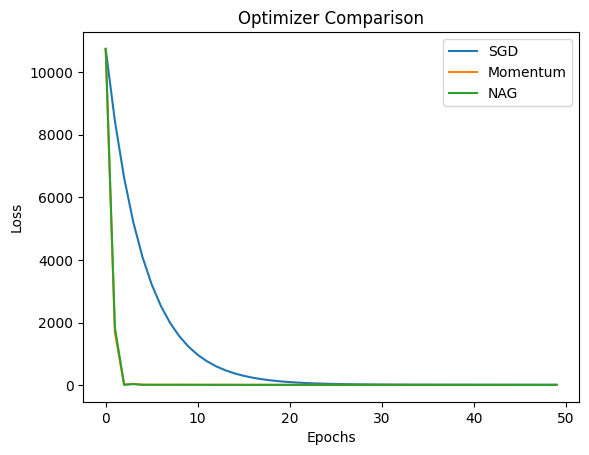

In [224]:
import matplotlib.pyplot as plt

epochs = 50
batch_size = 10

# --- SGD ---
w_sgd = weights.copy()
losses_sgd = []
for i in range(epochs):
    loss = mse_loss(Y_actual,w_sgd)
    losses_sgd.append(loss)
    w_sgd = min_batch_grad_descent_sgd(X,batch_size,Y_actual,w_sgd,learning_rate=0.0000001)

# --- Momentum ---
w_mom = weights.copy()
vel_mom = np.zeros_like(weights)
losses_mom = []
for i in range(epochs):
    loss = mse_loss(Y_actual,w_mom)
    losses_mom.append(loss)
    w_mom, vel_mom = min_batch_grad_descent_mom(X,batch_size,Y_actual,w_mom,learning_rate=0.0000001,gamma=0.9,velocity=vel_mom)

# --- NAG ---
w_nag = weights.copy()
vel_nag = np.zeros_like(weights)
losses_nag = []
for i in range(epochs):
    loss = mse_loss(Y_actual,w_nag)
    losses_nag.append(loss)
    w_nag, vel_nag = min_batch_grad_descent_nag(X,batch_size,Y_actual,w_nag,learning_rate=0.0000001,gamma=0.9,velocity=vel_nag)

# --- Plot ---
plt.plot(losses_sgd,label="SGD")
plt.plot(losses_mom,label="Momentum")
plt.plot(losses_nag,label="NAG")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Optimizer Comparison")
plt.show()
